# Two-dimensional vector fields with `matplotlib`

I introduce some basics to plot vector-fields with `matplotlib` as it is needed in [the plate-condensator homework task](05_Homework_Week_8.ipynb/#plate_condensator)

## Electrical potentials and electrical fields
Given an electrical potential $\Phi(x, y)$, the electric vector-field is given as $\vec{E}=-\nabla \Phi(x, y)$. Below we plot the electrical field for several configurations of point charges:
- The first example plots the field of a single, negatively charged point source at $(0, 0)$. This is to show you the basic principles with a small example.
- The second example shows the field of an electric multipole. You can change the kind of multiploe (dipole, quadrupole, octupole etc.) you want within the script.

The potential (in arbitrary units) of a point source at $(x_s, y_s)$ is given by:
$$
\Phi_{\rm point}(x, y)=\frac {\pm 1}{\sqrt{(x-x_s)^2 + (y-y_s)^2}}.
$$
The $+1$ is for a positive charge and the $-1$ for a negative one.

Please note in the following cells:
- The purpose of the notebook is to give you a first introduction to two-dimensional plots. Please note specifically the `np.meshgrid`-command, look up its documentation and try to understand how it works and how its output is used in subsequent commands.
- Please do not get confused that plots are created via `fig, ax = ...` and `ax.`-calls instead with the `plt.`-variants. The `fig, ax..` method is more flexible and we come back to it later in class. We need it here to create plots with equal scaling in `x` and `y`.
- The gradient of a scalar field can  be calculated with the `np.gradient` function.
- Note the output (order of `x` and `y`-components) of the vector field from `np.gradient`
- To plot the vector field, we basically have two functions: `ax.quiver` and `ax.streamplot`. `ax.quiver` plots individual vectors including direction and strength of the vector field. With our point-source, it is difficult to obtain a `nice-looking` plot but please play around with it anyways. `plt.streamplot` shows the *flow* of the field (negelcting the field-strength) and is better suited for our example.
- In the `ax.quiver` command we only plot each fifth point for clarity of the plot. Please check what happens if you *do not* do this!

### Plot of electric monopole

[[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.95 -0.95 -0.95 ... -0.95 -0.95 -0.95]
 [-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 ...
 [ 0.9   0.9   0.9  ...  0.9   0.9   0.9 ]
 [ 0.95  0.95  0.95 ...  0.95  0.95  0.95]
 [ 1.    1.    1.   ...  1.    1.    1.  ]]


Text(0.5, 1.0, 'electric monopole')

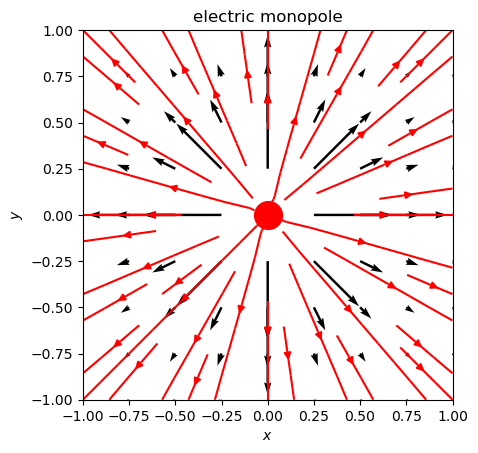

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# define discretization of one edge of the square on which the potential is
# to be calculated
coordinates = np.linspace(-1.0, 1.0, 41)

# necessary for np.gradient below
dh = coordinates[1] - coordinates[0]

# set up the meshgrid for plotting
X, Y = np.meshgrid( coordinates , coordinates)

# calculate the potential (on the two-dimensional grid)
# avoid the singularity at the origin:
phi = 0 * X
mask = X**2 + Y**2 > 0
phi[mask] = -1. / np.sqrt(X[mask]**2 + Y[mask]**2)

# calculate the gradient
# - unexpected order of return values
# - discretization size as the last two arguments
#   (here the same for x and y)
Ey, Ex = np.gradient(phi, dh, dh)


# plot the charge
fig, ax = plt.subplots()
# ensure equal scaling in x and y:
ax.set_aspect('equal')

ax.plot(0.0, 0.0, 'o', color='red', markersize=20)

# Please play around with the following two calls (comment
# them out consecutively) to plot vector fields!
ax.quiver(X[::5,::5], Y[::5,::5], Ex[::5,::5], Ey[::5,::5])
ax.streamplot(X, Y, Ex, Ey, density=0.5, color='red')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.title('electric monopole')



### Plot of electric multipole
In the following, we plot the more complex electric field of a multipole (quadrupole, octupole, ...):

In [ ]:
# script to plot a vector field of an electrical
# multipole.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def point_source(x_s, y_s, charge, X, Y):
    """
    calculate the electrostatic potential of a point source
    at (x_s, y_s) on the two-dimensional grid (X, Y).
    Charge can be +1 (positive charge) or -1 (negative charge).
    """

    # make sure that we do not divide by zero because the potential
    # of a point-source has a singularity!
    phi = 0 * X
    mask = (X - x_s)**2 + (Y - y_s)**2 > 0
    phi[mask] = charge / np.sqrt((X[mask] - x_s)**2 + (Y[mask] - y_s)**2) 

    return phi

# We consider a multipole on a circle with radius 0.5.
# The grid on which to calculate the potenital ranges from
# -1 to 1.
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)

# The grid-size is needed below to calculate the electric field
dh_x = x[1] - x[0]
dh_y = y[1] - y[0]

X, Y = np.meshgrid(x, y)

# the number of charges needs to be a power of 2:
n = 1
n_charges = 2**n # (n=1: dipole; n=2: quadruploe: n=3: octupole)

# the potential is zero at the start
phi = 0 * X

# setup the plot:
fig, ax = plt.subplots()
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)

charge = +1
for i in range(n_charges):
    angle = ((360.0 / n_charges) * i) * np.pi / 180.0
    
    x_s = 0.5 * np.cos(angle)
    y_s = 0.5 * np.sin(angle)

    phi = phi + point_source(x_s, y_s, charge, X, Y)

    charge *= -1

    if charge == 1:
        color = 'blue'
    else:
        color = 'red'

    ax.plot(x_s, y_s, 'o', color=color, markersize=20)

# calculate the electric field from the gradient of the potential
# phi. Note the order of the output! The Ey component comes first!
Ey, Ex = np.gradient(-phi, dh_x, dh_y)

ax.streamplot(X, Y, Ex, Ey, color='black', density=1.0)
#ax.quiver(X[::10,::10], Y[::10,::10], Ex[::10,::10], Ey[::10,::10],
#          angles='uv',
#          color='r', units='x', linewidths=(2,), edgecolors=('k'),
#          headaxislength=5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.title('electric multipole')
